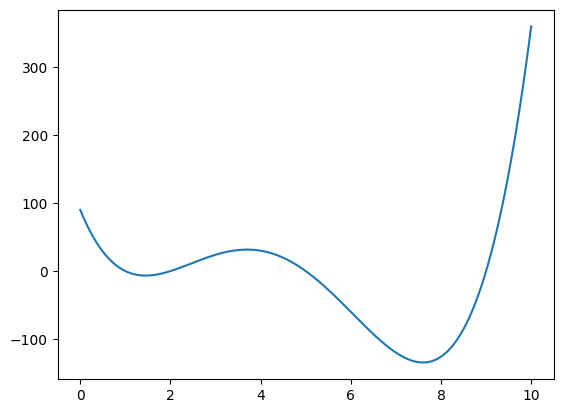

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# True function that we want to learn
def true_function(x):
    return (x-1)*(x-2)*(x-5)*(x-9)

# Visualizing function
# 1000 equidistant points between values 0 and 10
demo_x = np.linspace(0, 10, 1000)
# Apply true_function to demo_x data and convert it to numpy array
demo_y = np.array(list(map(true_function, demo_x)))

plt.plot(demo_x, demo_y)

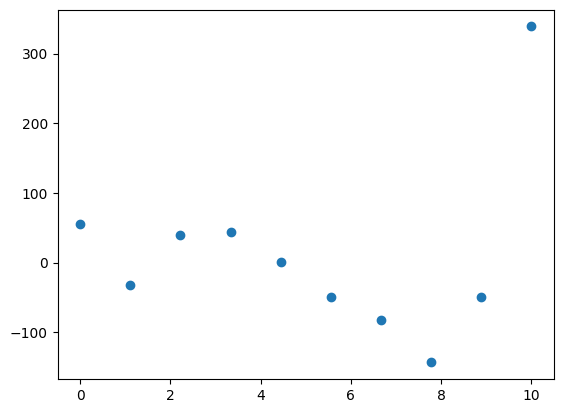

In [36]:
# Generating data
data_points_number = 10
x = np.linspace(0, 10, data_points_number)

# Adding Gaussian noise
# Normal distribution
mean = 0
std = 30
noise = np.random.normal(loc=0, scale=std, size=data_points_number)
y = np.array(list(map(true_function, x))) + noise

plt.scatter(x, y)

[[ 0.        ]
 [ 1.11111111]
 [ 2.22222222]
 [ 3.33333333]
 [ 4.44444444]
 [ 5.55555556]
 [ 6.66666667]
 [ 7.77777778]
 [ 8.88888889]
 [10.        ]]


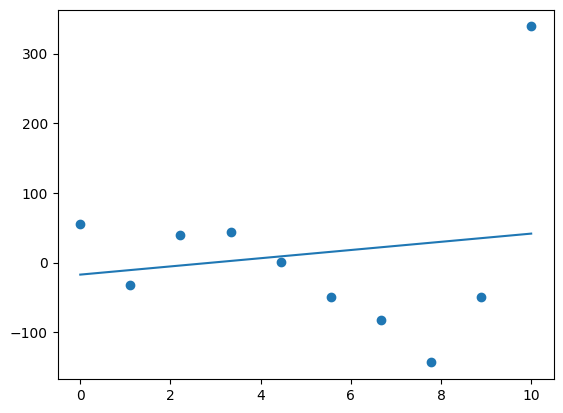

In [37]:
from sklearn.linear_model import LinearRegression

# Making x a matrix
X = x.reshape(-1, 1)
demo_X = demo_x.reshape(-1, 1)

# Training a model
linear_model = LinearRegression()
linear_model.fit(X, y)
print(X)

y_hat = linear_model.predict(X)
predictions = linear_model.predict(demo_X)

plt.scatter(x, y)
plt.plot(demo_x, predictions)


In [38]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y, y_hat)
mse = mean_squared_error(y, y_hat)
print(r2)
print(mse)

0.02302994252430557
14975.964454404657


In [39]:
y = 1e-5*y
linear_model.fit(X, y)
y_hat = linear_model.predict(X)

r2 = r2_score(y, y_hat)
mse = mean_squared_error(y, y_hat)
print(r2)
print(mse)
y *= 10**5

0.023029942524305236
1.4975964454404662e-06


[[   1.            0.            0.            0.        ]
 [   1.            1.11111111    1.2345679     1.37174211]
 [   1.            2.22222222    4.9382716    10.9739369 ]
 [   1.            3.33333333   11.11111111   37.03703704]
 [   1.            4.44444444   19.75308642   87.7914952 ]
 [   1.            5.55555556   30.86419753  171.46776406]
 [   1.            6.66666667   44.44444444  296.2962963 ]
 [   1.            7.77777778   60.49382716  470.50754458]
 [   1.            8.88888889   79.01234568  702.33196159]
 [   1.           10.          100.         1000.        ]]


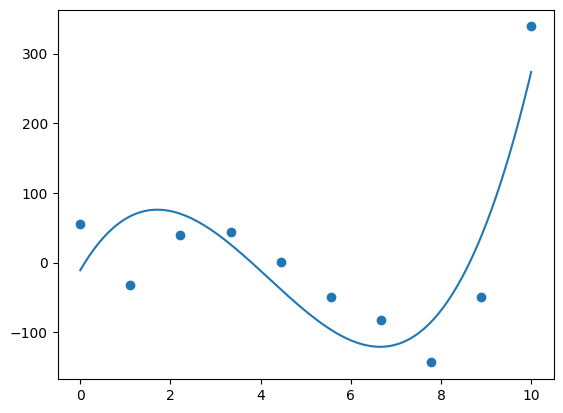

In [40]:
from sklearn.preprocessing import PolynomialFeatures

# Adding higher degree features
X = x.reshape(-1, 1)
poly = PolynomialFeatures(degree=3)
# x_i, ...
# x_i*x_j,...
# X_i*x_j*x_k,...

X = poly.fit_transform(X)
demo_X = demo_x.reshape(-1, 1)
demo_X = poly.transform(demo_X)

# Training a model
linear_model = LinearRegression()
linear_model.fit(X, y)
print(X)


y_hat = linear_model.predict(demo_X)

plt.scatter(x, y)
plt.plot(demo_x, y_hat)

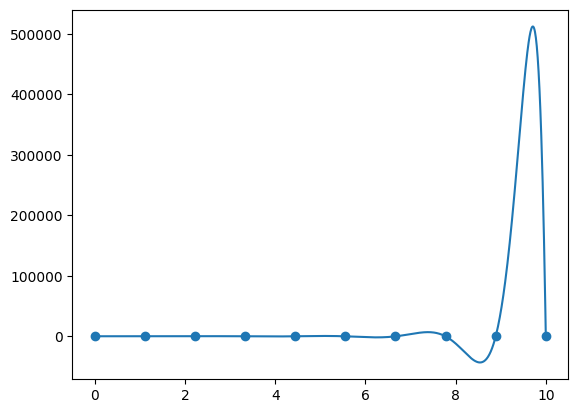

In [41]:
# Adding higher degree features
X = x.reshape(-1, 1)
poly = PolynomialFeatures(degree=15)
X = poly.fit_transform(X)
demo_X = demo_x.reshape(-1, 1)
demo_X = poly.transform(demo_X)

# Training a model
linear_model = LinearRegression()
linear_model.fit(X, y)


y_hat = linear_model.predict(demo_X)

plt.scatter(x, y)
plt.plot(demo_x, y_hat)

In [ ]:
from sklearn.linear_model import Ridge, Lasso

lasso_model = Lasso(alpha=1)
lasso_model.fit(X, y)
y_hat = lasso_model.predict(X)

y_demo = lasso_model.predict(demo_X)

plt.scatter(x, y_hat)
plt.plot(demo_x, y_demo)

print(lasso_model.coef_)

[ 0.00000000e+00 -2.09161787e-14 -1.52642118e-13 -9.63891891e-13
 -5.73677281e-12 -3.27810220e-11 -1.80028043e-10 -9.43409437e-10
 -4.64932466e-09 -2.10120287e-08 -8.31952754e-08 -2.62203122e-07
 -4.96945723e-07  1.79111565e-07 -1.99521338e-08  7.28437015e-10]


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


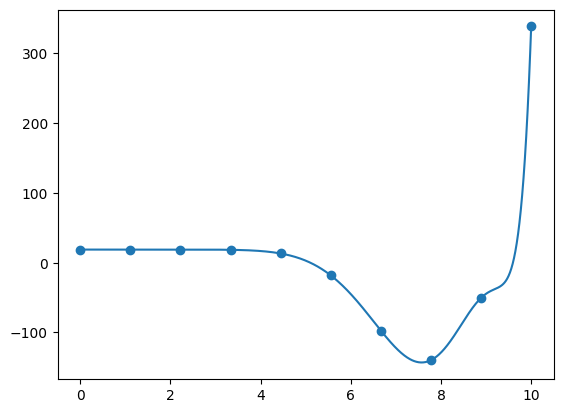

In [48]:
from sklearn.linear_model import Ridge, Lasso

ridge_model = Ridge(alpha=1)
ridge_model.fit(X, y)
y_hat = ridge_model.predict(X)

y_demo = ridge_model.predict(demo_X)

plt.scatter(x, y_hat)
plt.plot(demo_x, y_demo)

print(ridge_model.coef_)
